In [1]:
# This is version 1.1
# Export as slides command
# jupyter nbconvert Jupyter\ Slides.ipynb --to slides --post serve

# Credit Card Approval


Heba El-Shimy  
IBM **Cloud** Developer Advocate


<sub>GitHub: HebaNAS</sub>  
<sub>Twitter: @heba_el_shimy</sub>

# Pipeline

### 1. Loading Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import metrics

### 2. Loading Our Dataset

![insert-data](https://github.com/HebaNAS/IBM-Watson-Studio-Enablement/blob/master/02-CreditCardApprovalModel/imgs/insert-dataframe.jpg?raw=true)

In [4]:
# Insert your pandas DataFrame here



In [6]:
# Checking that everything is correct
pd.set_option('display.max_columns', 30)
applicants.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


### 3. Get some info about our Dataset and whether we have missing values

In [7]:
# After running this cell we will see that we have no missing values
applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [8]:
# Convert columns with numbers as values but object as datatype into numeric
cols = [1, 13]

# Set error level to coerce so any string value will be replaced with NaN
applicants[cols] = applicants[cols].apply(pd.to_numeric, errors='coerce')
applicants.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [9]:
# Check if we have any NaN values
applicants.isnull().values.any()

True

In [10]:
# Handle missing values using scikit learn Imputer
from sklearn.preprocessing import Imputer

# Define the values to replce and the strategy of choosing the replacement value
imp = Imputer(missing_values="NaN", strategy="mean")

applicants[cols] = imp.fit_transform(applicants[cols])
applicants.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [11]:
# Check if we have any NaN values
applicants.isnull().values.any()

False

In [12]:
applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null float64
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null float64
14    690 non-null int64
15    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


### 4. Descriptive analytics for our data

In [13]:
# Describe columns with numerical values
pd.set_option('precision', 3)
applicants.describe()

,1,2,7,10,13,14
count,690.000,690.000,690.000,690.000,690.000,690.000
mean,31.568,4.759,2.223,2.400,184.015,1017.386
std,11.853,4.978,3.347,4.863,172.159,5210.103
min,13.750,0.000,0.000,0.000,0.000,0.000
25%,22.670,1.000,0.165,0.000,80.000,0.000
50%,28.625,2.750,1.000,0.000,160.000,5.000
75%,37.707,7.207,2.625,3.000,272.000,395.500
max,80.250,28.000,28.500,67.000,2000.000,100000.000


In [14]:
# Find correlations
applicants.corr(method='pearson')

,1,2,7,10,13,14
1,1.000,0.201,0.393,0.186,-0.077,0.019
2,0.201,1.000,0.299,0.271,-0.222,0.123
7,0.393,0.299,1.000,0.322,-0.076,0.051
10,0.186,0.271,0.322,1.000,-0.120,0.064
13,-0.077,-0.222,-0.076,-0.120,1.000,0.066
14,0.019,0.123,0.051,0.064,0.066,1.000


### 5. Visualize our Data to understand it better

#### Plot Relationships

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


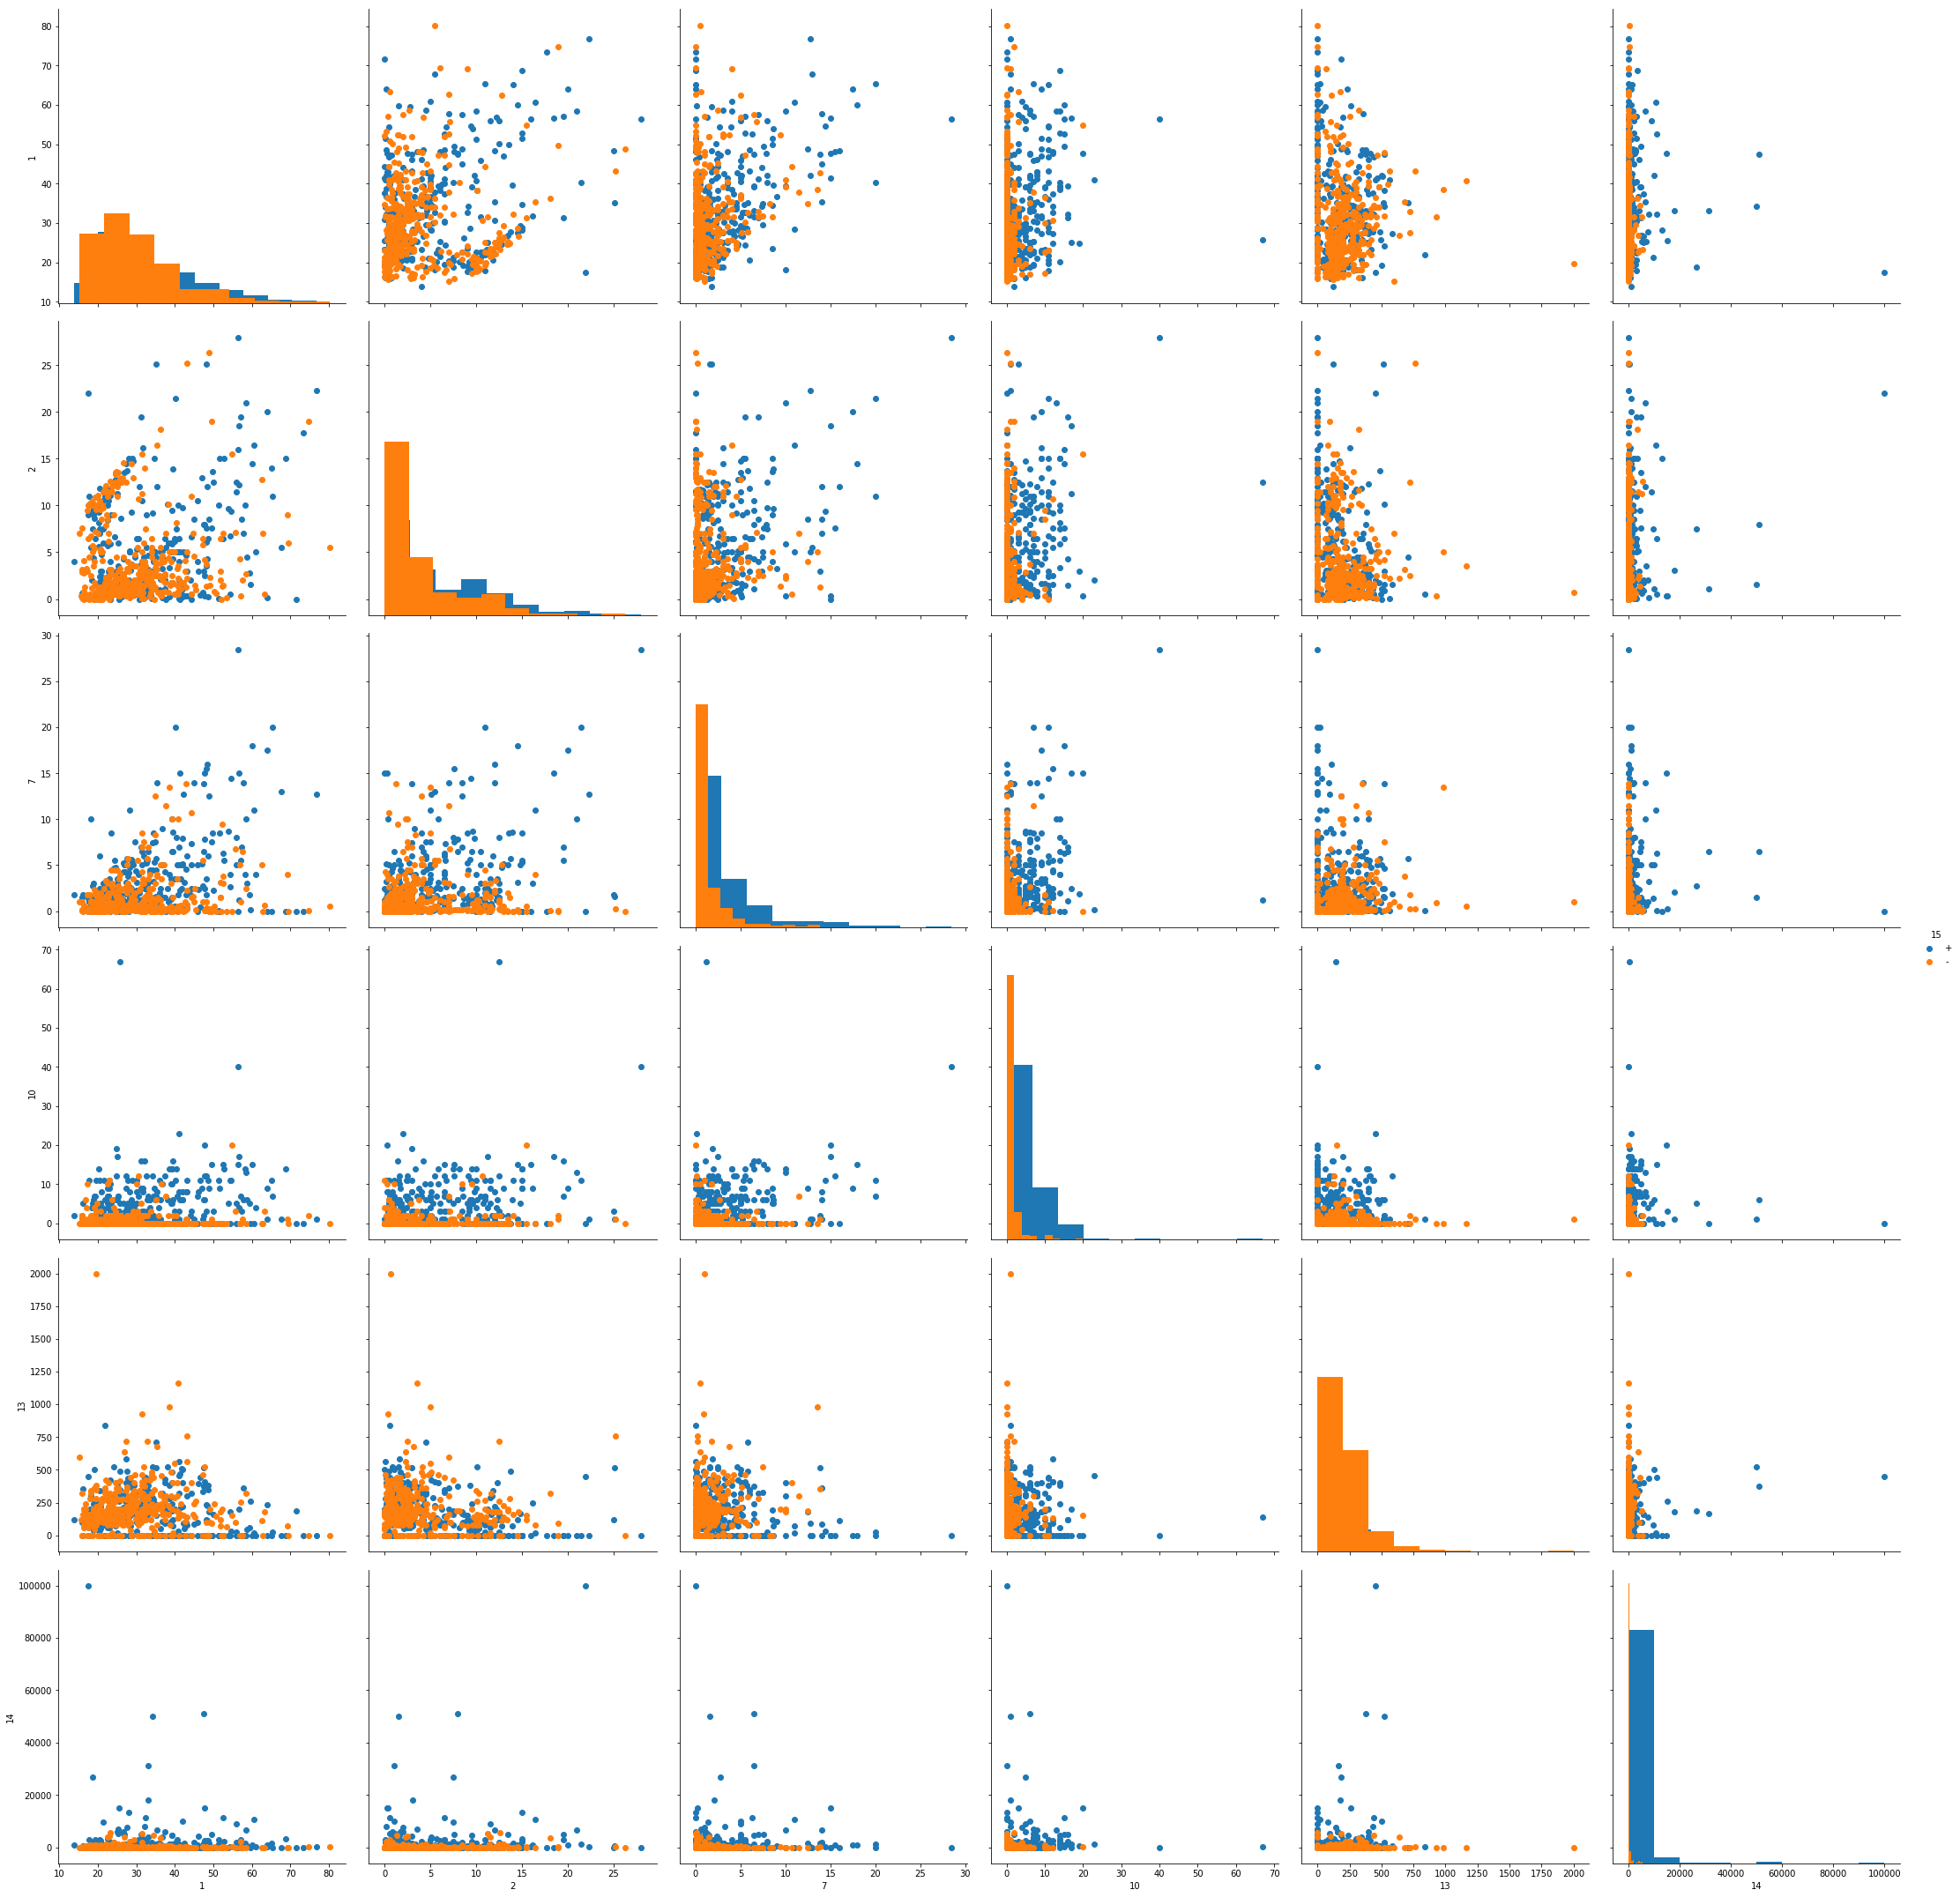

In [15]:
# Create Grid for pairwise relationships
gr = sns.PairGrid(applicants, size=5, hue=15)
gr = gr.map_diag(plt.hist)
gr = gr.map_offdiag(plt.scatter)
gr = gr.add_legend()

#### Understand Data Distribution

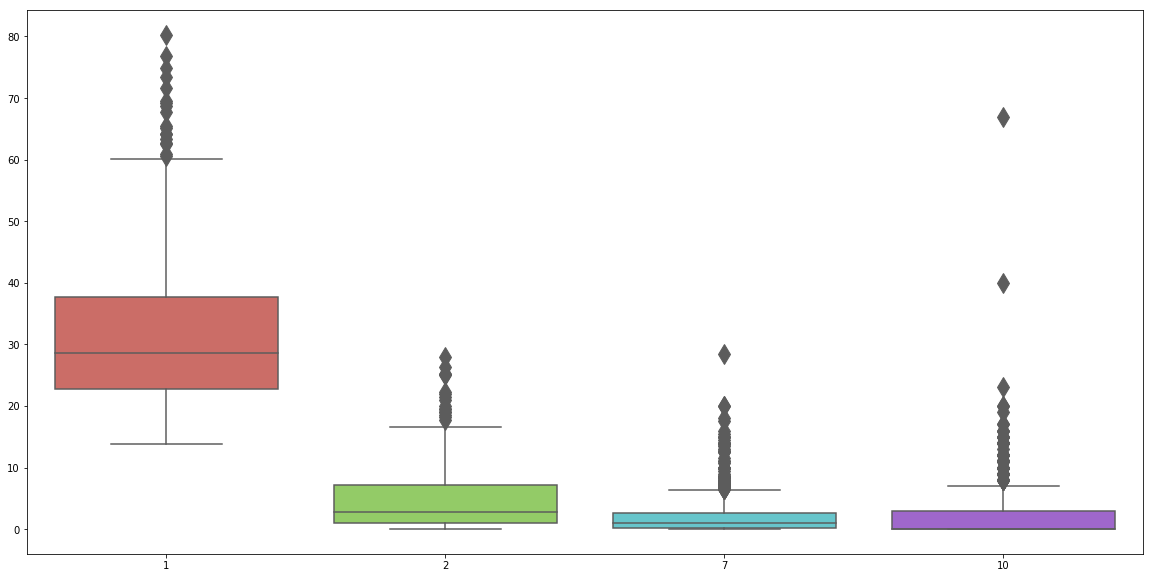

In [16]:
# Set up plot size
fig, ax = plt.subplots(figsize=(20,10))

# Attributes destribution
a = sns.boxplot(orient="v", palette="hls", data=applicants.iloc[:, :13], fliersize=14)

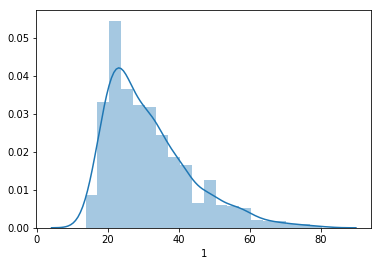

In [17]:
# Tenure data distribution
histogram = sns.distplot(applicants.iloc[:, 1], hist=True)
plt.show()

### 6. Encode string values in data into numerical values

In [18]:
# Use pandas get_dummies
applicants_encoded = pd.get_dummies(applicants)
applicants_encoded.head(10)

,1,2,7,10,13,14,0_?,0_a,0_b,3_?,3_l,3_u,3_y,4_?,4_g,...,6_n,6_o,6_v,6_z,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,15_+,15_-
0,30.83,0.000,1.250,1,202.0,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0
1,58.67,4.460,3.040,6,43.0,560,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0
2,24.50,0.500,1.500,0,280.0,824,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0
3,27.83,1.540,3.750,5,100.0,3,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0
4,20.17,5.625,1.710,0,120.0,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0
5,32.08,4.000,2.500,0,360.0,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0
6,33.17,1.040,6.500,0,164.0,31285,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0
7,22.92,11.585,0.040,0,80.0,1349,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0
8,54.42,0.500,3.960,0,180.0,314,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0
9,42.50,4.915,3.165,0,52.0,1442,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0


### 7. Create Training Set and Labels 

In [19]:
# Create training data for non-preprocessed approach
X_npp = applicants_encoded.iloc[:, :-2]
pd.DataFrame(X_npp).head(10)

,1,2,7,10,13,14,0_?,0_a,0_b,3_?,3_l,3_u,3_y,4_?,4_g,...,6_h,6_j,6_n,6_o,6_v,6_z,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s
0,30.83,0.000,1.250,1,202.0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.040,6,43.0,560,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.500,0,280.0,824,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.750,5,100.0,3,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.710,0,120.0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
5,32.08,4.000,2.500,0,360.0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0
6,33.17,1.040,6.500,0,164.0,31285,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0
7,22.92,11.585,0.040,0,80.0,1349,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
8,54.42,0.500,3.960,0,180.0,314,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
9,42.50,4.915,3.165,0,52.0,1442,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0


In [20]:
# Create training data for that will undergo preprocessing
X = applicants_encoded.iloc[:, :-2]
X.head()

,1,2,7,10,13,14,0_?,0_a,0_b,3_?,3_l,3_u,3_y,4_?,4_g,...,6_h,6_j,6_n,6_o,6_v,6_z,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s
0,30.83,0.000,1.25,1,202.0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1


In [21]:
# Extract labels
from sklearn.preprocessing import LabelEncoder

# Split last column from original dataset as the labels column
y = applicants[15]

# Apply encoder to transform strings to numeric values 0 and 1
le = LabelEncoder().fit(y)

y_enc = le.transform(y)
pd.DataFrame(y_enc).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### 8. Detect outliers in numerical values

In [22]:
# Detect outlier using interquartile method and remove them
def find_outliers(df):
    quartile_1, quartile_3 = np.percentile(df, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    outlier_indices = list(df.index[(df < lower_bound)|(df > upper_bound)])
    outlier_values = list(df[outlier_indices])
    
    df[outlier_indices] = np.NaN
    
    return df

In [23]:
# Find outliers in first column (continuous values)
print(find_outliers(X[1]))

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
5      32.08
6      33.17
7      22.92
8      54.42
9      42.50
10     22.08
11     29.92
12     38.25
13     48.08
14     45.83
15     36.67
16     28.25
17     23.25
18     21.83
19     19.17
20     25.00
21     23.25
22     47.75
23     27.42
24     41.17
25     15.83
26     47.00
27     56.58
28     57.42
29     42.08
       ...  
660    22.25
661    29.83
662    23.50
663    32.08
664    31.08
665    31.83
666    21.75
667    17.92
668    30.33
669    51.83
670    47.17
671    25.83
672    50.25
673    29.50
674    37.33
675    41.58
676    30.58
677    19.42
678    17.92
679    20.08
680    19.50
681    27.83
682    17.08
683    36.42
684    40.58
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: 1, Length: 690, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
# Find outliers in first column (continuous values)
print(find_outliers(X[2]))

0       0.000
1       4.460
2       0.500
3       1.540
4       5.625
5       4.000
6       1.040
7      11.585
8       0.500
9       4.915
10      0.830
11      1.835
12      6.000
13      6.040
14     10.500
15      4.415
16      0.875
17      5.875
18      0.250
19      8.585
20     11.250
21      1.000
22      8.000
23     14.500
24      6.500
25      0.585
26     13.000
27        NaN
28      8.500
29      1.040
        ...  
660     9.000
661     3.500
662     1.500
663     4.000
664     1.500
665     0.040
666    11.750
667     0.540
668     0.500
669     2.040
670     5.835
671    12.835
672     0.835
673     2.000
674     2.500
675     1.040
676    10.665
677     7.250
678    10.210
679     1.250
680     0.290
681     1.000
682     3.290
683     0.750
684     3.290
685    10.085
686     0.750
687    13.500
688     0.205
689     3.375
Name: 2, Length: 690, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
# Find outliers in first column (continuous values)
print(find_outliers(X[7]))

0      1.250
1      3.040
2      1.500
3      3.750
4      1.710
5      2.500
6        NaN
7      0.040
8      3.960
9      3.165
10     2.165
11     4.335
12     1.000
13     0.040
14     5.000
15     0.250
16     0.960
17     3.170
18     0.665
19     0.750
20     2.500
21     0.835
22       NaN
23     3.085
24     0.500
25     1.500
26     5.165
27       NaN
28       NaN
29     5.000
       ...  
660    0.085
661    0.165
662    0.875
663    1.500
664    0.040
665    0.040
666    0.250
667    1.750
668    0.085
669    1.500
670    5.500
671    0.500
672    0.500
673    2.000
674    0.210
675    0.665
676    0.085
677    0.040
678    0.000
679    0.000
680    0.290
681    3.000
682    0.335
683    0.585
684    3.500
685    1.250
686    2.000
687    2.000
688    0.040
689      NaN
Name: 7, Length: 690, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
# Find outliers in first column (continuous values)
print(find_outliers(X[10]))

0      1.0
1      6.0
2      0.0
3      5.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     7.0
15     NaN
16     3.0
17     NaN
18     0.0
19     7.0
20     NaN
21     0.0
22     6.0
23     1.0
24     3.0
25     2.0
26     NaN
27     NaN
28     3.0
29     6.0
      ... 
660    0.0
661    0.0
662    0.0
663    0.0
664    0.0
665    0.0
666    0.0
667    1.0
668    0.0
669    0.0
670    0.0
671    0.0
672    0.0
673    0.0
674    0.0
675    0.0
676    NaN
677    1.0
678    0.0
679    0.0
680    0.0
681    0.0
682    0.0
683    0.0
684    0.0
685    0.0
686    2.0
687    1.0
688    0.0
689    0.0
Name: 10, Length: 690, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
# Find outliers in first column (continuous values)
print(find_outliers(X[13]))

0      202.0
1       43.0
2      280.0
3      100.0
4      120.0
5      360.0
6      164.0
7       80.0
8      180.0
9       52.0
10     128.0
11     260.0
12       0.0
13       0.0
14       0.0
15     320.0
16     396.0
17     120.0
18       0.0
19      96.0
20     200.0
21     300.0
22       0.0
23     120.0
24     145.0
25     100.0
26       0.0
27       0.0
28       0.0
29     500.0
       ...  
660      0.0
661    216.0
662    160.0
663    120.0
664    160.0
665      0.0
666    180.0
667     80.0
668    252.0
669    120.0
670    465.0
671      0.0
672    240.0
673    256.0
674    260.0
675    240.0
676    129.0
677    100.0
678      0.0
679      0.0
680    280.0
681    176.0
682    140.0
683    240.0
684    400.0
685    260.0
686    200.0
687    200.0
688    280.0
689      0.0
Name: 13, Length: 690, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
# Find outliers in first column (continuous values)
print(find_outliers(X[14]))

0        0.0
1      560.0
2      824.0
3        3.0
4        0.0
5        0.0
6        NaN
7        NaN
8      314.0
9        NaN
10       0.0
11     200.0
12       0.0
13       NaN
14       0.0
15       0.0
16       0.0
17     245.0
18       0.0
19       0.0
20       NaN
21       0.0
22       NaN
23      11.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       NaN
       ...  
660      0.0
661      0.0
662      0.0
663      0.0
664      0.0
665      0.0
666      0.0
667      5.0
668      0.0
669      1.0
670    150.0
671      2.0
672    117.0
673     17.0
674    246.0
675    237.0
676      3.0
677      1.0
678     50.0
679      0.0
680    364.0
681    537.0
682      2.0
683      3.0
684      0.0
685      0.0
686    394.0
687      1.0
688    750.0
689      0.0
Name: 14, Length: 690, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
# Check for null values
X.isnull().values.any()

True

In [30]:
# Define the values to replce and the strategy of choosing the replacement value
suspected_cols = [1, 2, 7, 10, 13, 14]
imp = Imputer(missing_values="NaN", strategy="mean")

pd.DataFrame(X)[suspected_cols] = imp.fit_transform(pd.DataFrame(X)[suspected_cols])
pd.DataFrame(X).head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,1,2,7,10,13,14,0_?,0_a,0_b,3_?,3_l,3_u,3_y,4_?,4_g,...,6_h,6_j,6_n,6_o,6_v,6_z,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s
0,30.83,0.000,1.250,1.0,202.0,0.000,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.040,6.0,43.0,560.000,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.500,0.0,280.0,824.000,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.750,5.0,100.0,3.000,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.710,0.0,120.0,0.000,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
5,32.08,4.000,2.500,0.0,360.0,0.000,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0
6,33.17,1.040,1.362,0.0,164.0,101.047,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0
7,22.92,11.585,0.040,0.0,80.0,101.047,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
8,54.42,0.500,3.960,0.0,180.0,314.000,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
9,42.50,4.915,3.165,0.0,52.0,101.047,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0


In [31]:
# Check for null values
pd.DataFrame(X).isnull().values.any()

False

### 9. Feature Engineering

In [32]:
# Select best features
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X, y_enc)
indexes = selected_features.get_support(indices=True)
col_names_selected = [pd.DataFrame(X).columns[i] for i in indexes]

X_selected = pd.DataFrame(X)[col_names_selected]
pd.DataFrame(X_selected).head(10)

,1,2,7,10,14,3_u,3_y,4_g,4_p,5_cc,5_ff,5_i,5_q,5_x,6_ff,6_h,8_f,8_t,9_f,9_t
0,30.83,0.000,1.250,1.0,0.000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,58.67,4.460,3.040,6.0,560.000,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
2,24.50,0.500,1.500,0.0,824.000,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0
3,27.83,1.540,3.750,5.0,3.000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,20.17,5.625,1.710,0.0,0.000,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
5,32.08,4.000,2.500,0.0,0.000,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,33.17,1.040,1.362,0.0,101.047,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0
7,22.92,11.585,0.040,0.0,101.047,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0
8,54.42,0.500,3.960,0.0,314.000,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0
9,42.50,4.915,3.165,0.0,101.047,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0


### 10. Split our dataset into train and test datasets

#### Split non-preprocessed data

In [33]:
X_train_npp, X_test_npp, y_train_npp, y_test_npp = train_test_split(X_npp, y_enc,\
                                                    test_size=0.3, random_state=42)
print(X_train_npp.shape, y_train_npp.shape)
print(X_test_npp.shape, y_test_npp.shape)

(483, 51) (483,)
(207, 51) (207,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_enc,\
                                                    test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(483, 20) (483,)
(207, 20) (207,)


### 11. Scale our data

In [35]:
# Use StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)

pd.DataFrame(X_train_scaled, columns=pd.DataFrame(X_train).columns).head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,1,2,7,10,14,3_u,3_y,4_g,4_p,5_cc,5_ff,5_i,5_q,5_x,6_ff,6_h,8_f,8_t,9_f,9_t
0,-1.184,1.234,-0.084,1.625,2.406,0.600,-0.578,0.600,-0.578,-0.234,-0.3,-0.305,2.790,-0.224,-0.313,-0.492,-0.977,0.977,-1.135,1.135
1,-1.314,-1.034,-0.881,-0.607,3.407,-1.665,1.730,-1.665,1.730,-0.234,-0.3,-0.305,-0.358,-0.224,-0.313,-0.492,1.023,-1.023,0.881,-0.881
2,-0.785,1.790,0.113,-0.607,-0.009,-1.665,1.730,-1.665,1.730,-0.234,-0.3,-0.305,-0.358,-0.224,-0.313,-0.492,1.023,-1.023,0.881,-0.881
3,1.240,0.017,-0.765,-0.049,-0.069,0.600,-0.578,0.600,-0.578,-0.234,-0.3,-0.305,2.790,-0.224,-0.313,2.034,-0.977,0.977,-1.135,1.135
4,-1.314,-0.993,-0.680,1.625,-0.521,0.600,-0.578,0.600,-0.578,-0.234,-0.3,-0.305,2.790,-0.224,-0.313,-0.492,1.023,-1.023,-1.135,1.135


In [36]:
pd.DataFrame(y_train).head()

,0
0,0
1,1
2,1
3,1
4,1


### 12. Start building a classifier

#### Logestic Regression on non-preprocessed data

In [37]:
from sklearn.linear_model import LogisticRegression

clf_lr_npp = LogisticRegression()
clf_lr_npp.fit(X_train_npp, y_train_npp)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Logestic Regression on preprocessed data

In [38]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
model = clf_lr.fit(X_train_scaled, y_train)
model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 13. Evaluate our model

In [39]:
# Use the scaler fit on trained data to scale our test data
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_test_scaled, columns=pd.DataFrame(X_train).columns).head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,1,2,7,10,14,3_u,3_y,4_g,4_p,5_cc,5_ff,5_i,5_q,5_x,6_ff,6_h,8_f,8_t,9_f,9_t
0,0.100,-0.684,-0.908,0.509,0.013,0.600,-0.578,0.600,-0.578,-0.234,3.328,-0.305,-0.358,-0.224,3.199,-0.492,1.023,-1.023,-1.135,1.135
1,1.508,-0.065,-0.908,-0.607,4.717,0.600,-0.578,0.600,-0.578,-0.234,-0.300,-0.305,-0.358,-0.224,-0.313,-0.492,-0.977,0.977,0.881,-0.881
2,-1.029,-1.055,-0.568,-0.607,-0.565,0.600,-0.578,0.600,-0.578,-0.234,-0.300,-0.305,-0.358,-0.224,-0.313,-0.492,1.023,-1.023,0.881,-0.881
3,1.638,0.553,-0.227,-0.607,0.690,0.600,-0.578,0.600,-0.578,-0.234,-0.300,-0.305,-0.358,-0.224,-0.313,-0.492,1.023,-1.023,0.881,-0.881
4,-1.110,-1.055,-0.908,-0.607,-0.559,-1.665,1.730,-1.665,1.730,-0.234,-0.300,-0.305,-0.358,-0.224,-0.313,-0.492,1.023,-1.023,0.881,-0.881


#### Evaluate Logistic Regression on non-preprocessed data

In [40]:
y_score_lr_npp = clf_lr_npp.decision_function(X_test_npp)
y_score_lr_npp

array([ 3.79114351e+00, -1.53289391e+00,  3.59750686e+00,  2.63899790e+00,
        5.34015063e+00,  1.91329086e-01,  2.98874665e+00,  8.67871930e-02,
        3.58419649e+00,  3.70771837e+00,  2.70176737e+00, -1.66358540e+00,
        3.30947758e+00, -2.16630789e-01,  1.65493314e+00, -9.88884781e-01,
        3.08195370e+00,  4.06404098e+00,  1.72760092e+00,  2.24916855e+00,
        2.84404228e+00,  3.23920898e+00,  3.90750984e+00, -9.35919037e-01,
        2.75681502e+00,  4.32138435e+00, -3.96619809e+00, -2.43401740e+00,
        3.17308702e+00,  3.08414031e+00, -1.36637422e+00, -4.38155190e+00,
       -1.47865022e+00, -1.53280871e+00, -5.89477010e-03, -3.27439787e+00,
       -3.23184603e+00, -1.70721642e+00, -1.24822963e+00, -3.89545810e+01,
       -2.22081486e+00, -2.03776823e+00,  3.28656327e+00, -1.41177687e+00,
        3.87553319e+00, -5.86624065e+00,  2.55288734e+00,  5.04640615e+00,
        3.70524984e-01,  3.67618059e+00,  4.14496605e+00, -1.06645262e+00,
        3.26419631e+00,  

In [41]:
# Get accuracy score
from sklearn.metrics import accuracy_score

y_pred_lr_npp = clf_lr_npp.predict(X_test_npp)
acc_lr_npp = accuracy_score(y_test_npp, y_pred_lr_npp)
print(acc_lr_npp)

0.8405797101449275


In [42]:
# Get Precision vs. Recall score
from sklearn.metrics import average_precision_score

average_precision_lr_npp = average_precision_score(y_test_npp, y_score_lr_npp)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_lr_npp))

Average precision-recall score: 0.90


#### Evaluate Logistic Regression on preprocessed data

In [43]:
y_score_lr = clf_lr.decision_function(X_test_scaled)
y_score_lr

array([ 3.56748043, -2.73442698,  3.8015596 ,  2.35479139,  4.59269848,
       -0.8607685 ,  2.88428431, -0.91354643,  3.84927625,  3.22768285,
        3.58946094, -2.71929997,  3.25251482, -1.07305078,  2.51828729,
       -1.64178561,  2.13600714,  3.95220877,  0.79395167,  1.71794504,
        2.59317613,  1.94079023,  4.50506087, -2.90542169,  2.82553382,
        3.81591255, -2.09719645, -2.16097604,  4.36303526,  3.27114743,
       -3.09495293, -5.35336695, -1.22127421, -1.27589192, -0.27360866,
       -1.57714257, -1.38991232, -3.80568844, -1.46912589, -2.48294848,
       -3.77811265, -2.14891293,  3.48721316, -1.34557765,  2.97620065,
       -4.42509853,  2.46208432,  4.43784814, -0.26272097,  4.17192989,
        4.59461887, -1.11900003,  3.50150034,  3.13145608, -1.05864704,
        3.72408428, -2.92307375,  3.94432024, -1.03795131,  3.72260601,
       -4.55291223, -2.54102105, -1.77485624,  0.70497922,  4.02256182,
       -1.85814971, -3.46653777, -0.3313209 , -2.06875843,  3.46

In [44]:
y_pred_lr = clf_lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(acc_lr)

0.8502415458937198


In [45]:
average_precision_lr = average_precision_score(y_test, y_score_lr)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_lr))

Average precision-recall score: 0.90


### 14. ROC Curve and models comparisons

Text(0, 0.5, 'True Positives')

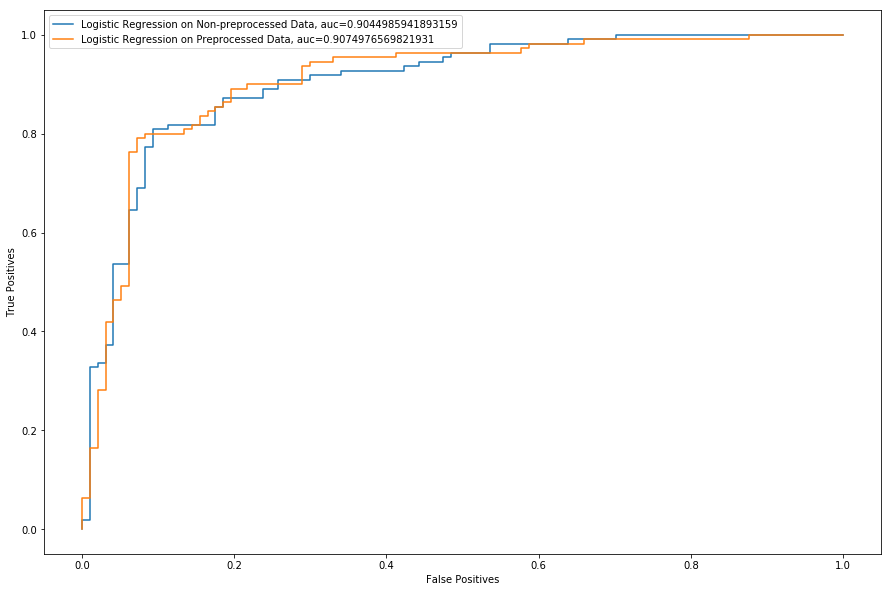

In [46]:
# Plot SVC ROC Curve
plt.figure(0, figsize=(15,10)).clf()

fpr_lr_npp, tpr_lr_npp, thresh_lr_npp = metrics.roc_curve(y_test_npp, y_score_lr_npp)
auc_lr_npp = metrics.roc_auc_score(y_test_npp, y_score_lr_npp)
plt.plot(fpr_lr_npp, tpr_lr_npp, label="Logistic Regression on Non-preprocessed Data, auc=" + str(auc_lr_npp))

fpr_lr, tpr_lr, thresh_lr = metrics.roc_curve(y_test, y_score_lr)
auc_lr = metrics.roc_auc_score(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression on Preprocessed Data, auc=" + str(auc_lr))

plt.legend(loc=0)
plt.xlabel('False Positives')
plt.ylabel('True Positives')

#### Bonus: Deploy model on the cloud using IBM Watson Machine Learning

We have our model, but we want to use it through multiple apps. A solution is to deploy it on the cloud as an endpoint (url) and send data collected from a web/mobile app as a REST API call with data sent in the form of a JSON request.

In [47]:
# *** Code added Oct. 2019
# Set up the WML instance
# First, import the WatsonMachineLearningAPIClient module.
from watson_machine_learning_client import WatsonMachineLearningAPIClient


In [48]:


# To work with the Watson Machine Learning REST API you must generate a Bearer access token
import urllib3, requests, json

# *** NEED TO REPLACE WITH YOUR WML CREDENTIALS HERE ***
credentials={
    
}


In [49]:


wml_client = WatsonMachineLearningAPIClient(credentials)
wml_models = wml_client.repository.get_details()

## Model Name
MODEL_NAME = "Credit Card Approval Model"

model_uid = None
for model_in in wml_models['models']['resources']:
    if MODEL_NAME == model_in['entity']['name']:
        model_uid = model_in['metadata']['guid']
        break

if model_uid is None:
    print("Storing model ...")
    published_model_details = wml_client.repository.store_model(model, MODEL_NAME)   
    #published_model = wml_client.repository.store_model(model=model,MODEL_NAME,training_data=X_train_scaled,training_target=y_train)
    model_uid = wml_client.repository.get_model_uid(published_model_details)
    print("model_uid:", model_uid)
    print("Done")



Storing model ...
model_uid: 347664a5-bc06-4a4b-a203-d863e5be17b5
Done


In [50]:
##
# List all the current models in the WML Respository.
## 

published_model_details = wml_client.repository.list_models()

------------------------------------  ------------------------------  ------------------------  -----------------
GUID                                  NAME                            CREATED                   FRAMEWORK
347664a5-bc06-4a4b-a203-d863e5be17b5  Credit Card Approval Model      2019-12-03T16:56:28.657Z  scikit-learn-0.20
723a0a5b-23d9-4dcd-b624-1a7692ac63e2  LoanApproval_SPSS_RandomForest  2019-12-02T21:10:40.191Z  pmml-4.2
efe1cdd0-96c0-4450-bd7c-c9b1774c03a7  LoanApproval_SPSS_LSVM          2019-12-02T21:09:09.042Z  pmml-4.2
13a78837-ccfa-4d4e-99c1-7434283a27a7  LoanApproval_SPSS_LSVM          2019-12-02T21:08:26.297Z  spss-modeler-18.1
------------------------------------  ------------------------------  ------------------------  -----------------


In [51]:
## Model Deployment Name and Description
MODEL_DEPLOYMENT_NAME = "Credit Card Approval Deployment Model"
MODEL_DEPLOYMENT_DESCRIPTION = "Credit Card Approval Deployment Model Desc"

wml_deployments = wml_client.deployments.get_details()
deployment_uid = None

for deployment in wml_deployments['resources']:
    if MODEL_DEPLOYMENT_NAME == deployment['entity']['name']:
        deployment_uid = deployment['metadata']['guid']
        break

if deployment_uid is None:
    print("Deploying model...")

    deployment       = wml_client.deployments.create( model_uid, MODEL_DEPLOYMENT_NAME, MODEL_DEPLOYMENT_DESCRIPTION)
    scoring_endpoint = wml_client.deployments.get_scoring_url( deployment )


print("Model id: {}".format(model_uid))
print("Deployment id: {}".format(deployment_uid))    
print( "scoring_endpoint: ", scoring_endpoint )

# Get model details and expected input
model_details = wml_client.repository.get_details(model_uid)
print(json.dumps(model_details, indent=2))

Deploying model...


#######################################################################################

Synchronous deployment creation for uid: '347664a5-bc06-4a4b-a203-d863e5be17b5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='cad095b6-5f7e-4e32-9d83-cebdaa1f3935'
------------------------------------------------------------------------------------------------


Model id: 347664a5-bc06-4a4b-a203-d863e5be17b5
Deployment id: None
scoring_endpoint:  https://eu-de.ml.cloud.ibm.com/v3/wml_instances/803a31b0-c70c-4005-85da-a3f5f2c73595/deployments/cad095b6-5f7e-4e32-9d83-cebdaa1f3935/online
{
  "metadata": {
    "guid": "347664a5-bc06-4a4b-a203-d863e5be17b5",
    "url": "https://eu-de.ml.cloud.ibm.com/v3/wml_instances/803a31b0-c70c-4005-85da-a3f5f2c

## References:

#### <a name="first" id="first"></a><sub>[1] https://www.sciencedirect.com/science/article/abs/pii/S0148296318301231 "Customer churn prediction in telecommunication industry using data certainty"</sub>  
#### <a name="second" id="second"></a><sub>[2] https://www.signal.co/blog/understanding-customer-churn/ "10 Stats Expose the Real Connection Between Customer Experience and Customer Churn"</sub>  
#### <a name="third" id="third"></a><sub>[3] https://www.pinterest.com/pin/456904324667676431/ "Mobile Telco Churn Infographic"</sub>  
#### <sub>[4] https://pandas.pydata.org/pandas-docs/stable/ "Pandas Documentation"</sub>  
#### <sub>[5] http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html "Scikit-Learn Imputer"</sub>  
#### <sub>[6] https://github.com/ibm-watson-data-lab/pixiedust/wiki/Tutorial:-Extending-the-PixieDust-Visualization "PixieDust Documentation"</sub>
#### <sub>[7] https://seaborn.pydata.org/ "Seaborn Documentation"</sub>
#### <sub>[8] http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder "Scikit-Learn LabelEncoder"</sub>
#### <sub>[9] http://colingorrie.github.io/outlier-detection.html "Outlier Detection Methods"</sub>
#### <sub>[10] http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py "Scikit-Learn Polynomial"</sub>
#### <sub>[11] http://scikit-learn.org/stable/modules/feature_selection.html "Scikit-Learn Feature Selection"</sub>
#### <sub>[12] http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler "Scikit-Learn StandardScaler"</sub>
#### <sub>[13] http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC "Scikit-Learn SVC"</sub>
#### <sub>[14] http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression "Scikit-Learn Logistic Regression"</sub>
#### <sub>[15] http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html "Scikit-Learn MLP Classifier"</sub>
#### <sub>[16] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score "Scikit-Learn Accuracy Score"</sub>
#### <sub>[17] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score "Scikit-Learn Average Precision Score"</sub>
#### <sub>[18] https://www.sciencedirect.com/science/article/pii/S016786550500303X "An introduction to ROC analysis"</sub>
#### <sub>[19] https://wml-api-pyclient.mybluemix.net/ "Watson Machine Learning Client Documentation"</sub>
#### <sub>[20] https://dataplatform.ibm.com/docs/content/analyze-data/ml-deploy-notebook.html?context=analytics "IBM Watson Studio Documentation-Deploy a model from a notebook"</sub>